Select a box and press Shift+Enter to run

In [1]:
## standard imports
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *
from IPython import display
import PIL.Image

## custom libraries
from MDP import MDP
from ValueIteration import VI, vi_wrapper
from visualization import visualize_values, visualize_map
from generator import default_env, make_env

## initialize MDP 
mdp = MDP(default_env['rewards'], default_env['terminal'])
vi = VI(mdp)

Let's consider the map below, a Lava World with a single goal

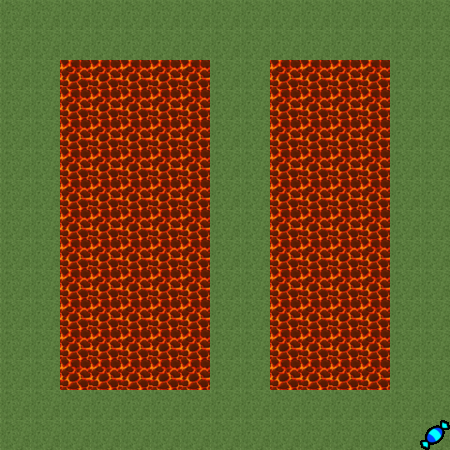

In [2]:
grid = visualize_map(default_env['rewards'], default_env['terminal'], cell_dim=30)
PIL.Image.fromarray(grid, 'RGB')

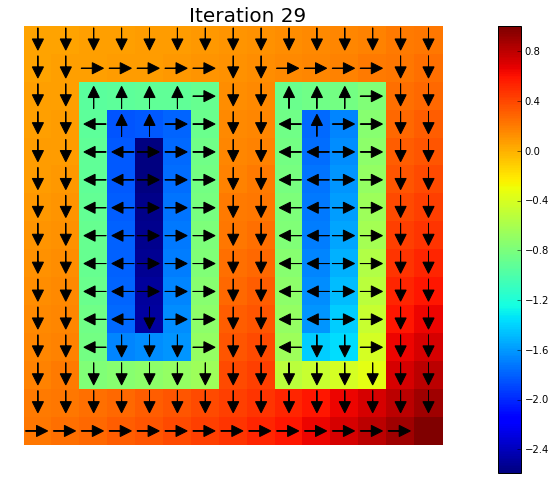

In [10]:
## Run value iteration on MDP
values, policy = vi.iterate(iterations=30, visualize=True)

Now we look at the effects of changing the rewards and discount value. We'll use the following map:

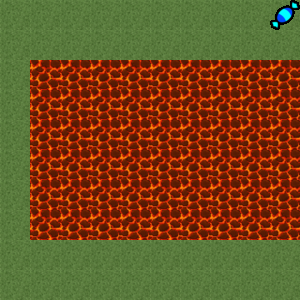

In [8]:
rewards, terminal = make_env(0,1,-1)
small_map = visualize_map(rewards, terminal, cell_dim=30)
PIL.Image.fromarray(small_map, 'RGB')

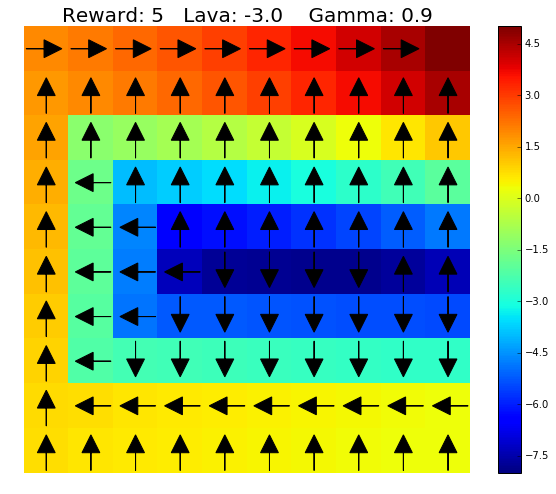

In [9]:
interact(vi_wrapper, reward=widgets.IntSlider(min=1,max=8,step=1,value=5), lava=widgets.FloatSlider(min=-5,max=0,step=0.25,value=-3), discount=widgets.FloatSlider(min=0.1,max=0.9,step=0.1,value=0.9));